In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
data = pd.read_csv('Adult mortality rate (2019-2021).csv')
data


,Countries,Continent,Average_Pop(thousands people),Average_GDP(M$),Average_GDP_per_capita($),Average_HEXP($),Development_level,AMR_female(per_1000_female_adults),AMR_male(per_1000_male_adults),Average_CDR
0,Afghanistan,Asia,38947.06,17995.64,462.05,80.53,Short,204.85,322.17,7.08
1,Albania,Europe,2834.57,16263.16,5737.44,420.17,Short,53.54,103.55,10.20
2,Algeria,Africa,43445.00,160325.54,3690.31,215.53,Short,70.85,102.21,4.78
3,Angola,Africa,33428.62,72148.29,2158.28,61.29,Short,218.03,316.81,7.88
4,Antigua and Barbuda,North America,92.67,1509.63,16290.97,868.60,Average,58.76,103.77,6.06
...,...,...,...,...,...,...,...,...,...,...
151,Uzbekistan,Asia,34242.50,62977.99,1839.18,127.24,Short,121.32,204.67,4.90
152,Vanuatu,Australia,311.74,939.19,3012.72,122.06,Short,136.51,192.91,5.52
153,Viet Nam,Asia,96631.14,349039.52,3612.08,173.11,Short,73.97,178.17,6.73
154,Zambia,Africa,18927.11,21188.98,1119.50,79.17,Short,231.56,341.14,6.72


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Countries                           156 non-null    object 
 1   Continent                           156 non-null    object 
 2   Average_Pop(thousands people)       156 non-null    float64
 3   Average_GDP(M$)                     156 non-null    float64
 4   Average_GDP_per_capita($)           156 non-null    float64
 5   Average_HEXP($)                     156 non-null    float64
 6   Development_level                   156 non-null    object 
 7   AMR_female(per_1000_female_adults)  156 non-null    float64
 8   AMR_male(per_1000_male_adults)      156 non-null    float64
 9   Average_CDR                         156 non-null    float64
dtypes: float64(7), object(3)
memory usage: 12.3+ KB


In [4]:
data.isnull().sum()

Countries                             0
Continent                             0
Average_Pop(thousands people)         0
Average_GDP(M$)                       0
Average_GDP_per_capita($)             0
Average_HEXP($)                       0
Development_level                     0
AMR_female(per_1000_female_adults)    0
AMR_male(per_1000_male_adults)        0
Average_CDR                           0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Average_Pop(thousands people),156.0,41450.308974,1.616104e+05,11.08,2092.5825,8778.430,26924.1800,1410401.67
Average_GDP(M$),156.0,363648.353846,1.402295e+06,55.31,11227.1525,36135.590,222365.8450,15654113.01
Average_GDP_per_capita($),156.0,14009.898974,2.031515e+04,257.74,1987.8625,5819.610,16348.1900,121304.68
Average_HEXP($),156.0,1165.549551,1.875715e+03,18.92,93.2475,408.170,1154.5200,10107.99
AMR_female(per_1000_female_adults),156.0,130.893590,8.450334e+01,24.06,62.4400,109.050,184.6425,411.09
AMR_male(per_1000_male_adults),156.0,202.383013,1.038042e+02,46.79,113.4750,195.000,269.8975,524.48
Average_CDR,156.0,8.143654,2.953754e+00,1.17,6.3975,7.615,9.3875,18.40


In [6]:
data.shape

(156, 10)

In [7]:
data.columns

Index(['Countries', 'Continent', 'Average_Pop(thousands people)',
       'Average_GDP(M$)', 'Average_GDP_per_capita($)', 'Average_HEXP($)',
       'Development_level', 'AMR_female(per_1000_female_adults)',
       'AMR_male(per_1000_male_adults)', 'Average_CDR'],
      dtype='object')

In [8]:
target = 'Average_CDR'


In [9]:
data.drop(columns = ['Countries'], inplace = True)


In [10]:
data

,Continent,Average_Pop(thousands people),Average_GDP(M$),Average_GDP_per_capita($),Average_HEXP($),Development_level,AMR_female(per_1000_female_adults),AMR_male(per_1000_male_adults),Average_CDR
0,Asia,38947.06,17995.64,462.05,80.53,Short,204.85,322.17,7.08
1,Europe,2834.57,16263.16,5737.44,420.17,Short,53.54,103.55,10.20
2,Africa,43445.00,160325.54,3690.31,215.53,Short,70.85,102.21,4.78
3,Africa,33428.62,72148.29,2158.28,61.29,Short,218.03,316.81,7.88
4,North America,92.67,1509.63,16290.97,868.60,Average,58.76,103.77,6.06
...,...,...,...,...,...,...,...,...,...
151,Asia,34242.50,62977.99,1839.18,127.24,Short,121.32,204.67,4.90
152,Australia,311.74,939.19,3012.72,122.06,Short,136.51,192.91,5.52
153,Asia,96631.14,349039.52,3612.08,173.11,Short,73.97,178.17,6.73
154,Africa,18927.11,21188.98,1119.50,79.17,Short,231.56,341.14,6.72


In [11]:
cols2labelEncode = ['Continent', 'Development_level']

le = LabelEncoder()

for col in cols2labelEncode:
  data[col] = le.fit_transform(data[col])

In [12]:
data

,Continent,Average_Pop(thousands people),Average_GDP(M$),Average_GDP_per_capita($),Average_HEXP($),Development_level,AMR_female(per_1000_female_adults),AMR_male(per_1000_male_adults),Average_CDR
0,1,38947.06,17995.64,462.05,80.53,2,204.85,322.17,7.08
1,3,2834.57,16263.16,5737.44,420.17,2,53.54,103.55,10.20
2,0,43445.00,160325.54,3690.31,215.53,2,70.85,102.21,4.78
3,0,33428.62,72148.29,2158.28,61.29,2,218.03,316.81,7.88
4,4,92.67,1509.63,16290.97,868.60,0,58.76,103.77,6.06
...,...,...,...,...,...,...,...,...,...
151,1,34242.50,62977.99,1839.18,127.24,2,121.32,204.67,4.90
152,2,311.74,939.19,3012.72,122.06,2,136.51,192.91,5.52
153,1,96631.14,349039.52,3612.08,173.11,2,73.97,178.17,6.73
154,0,18927.11,21188.98,1119.50,79.17,2,231.56,341.14,6.72


In [13]:
data.keys()

Index(['Continent', 'Average_Pop(thousands people)', 'Average_GDP(M$)',
       'Average_GDP_per_capita($)', 'Average_HEXP($)', 'Development_level',
       'AMR_female(per_1000_female_adults)', 'AMR_male(per_1000_male_adults)',
       'Average_CDR'],
      dtype='object')

In [14]:
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop(target)
data[cols2zscore] = data[cols2zscore].astype(float).apply(stats.zscore)

In [15]:
data

,Continent,Average_Pop(thousands people),Average_GDP(M$),Average_GDP_per_capita($),Average_HEXP($),Development_level,AMR_female(per_1000_female_adults),AMR_male(per_1000_male_adults),Average_CDR
0,-0.527985,-0.015539,-0.247285,-0.669032,-0.580320,0.655293,0.878008,1.157687,7.08
1,0.701353,-0.239713,-0.248524,-0.408518,-0.398664,0.655293,-0.918339,-0.955176,10.20
2,-1.142654,0.012382,-0.145460,-0.509611,-0.508115,0.655293,-0.712835,-0.968127,4.78
3,-1.142654,-0.049796,-0.208543,-0.585267,-0.590610,0.655293,1.034480,1.105885,7.88
4,1.316022,-0.256734,-0.259079,0.112646,-0.158823,-1.807976,-0.856367,-0.953050,6.06
...,...,...,...,...,...,...,...,...,...
151,-0.527985,-0.044744,-0.215104,-0.601025,-0.555337,0.655293,-0.113657,0.022103,4.90
152,0.086684,-0.255374,-0.259487,-0.543072,-0.558107,0.655293,0.066678,-0.091552,5.52
153,-0.527985,0.342543,-0.010451,-0.513474,-0.530803,0.655293,-0.675795,-0.234008,6.73
154,-1.142654,-0.139816,-0.245000,-0.636565,-0.581047,0.655293,1.195108,1.341023,6.72


<Axes: >

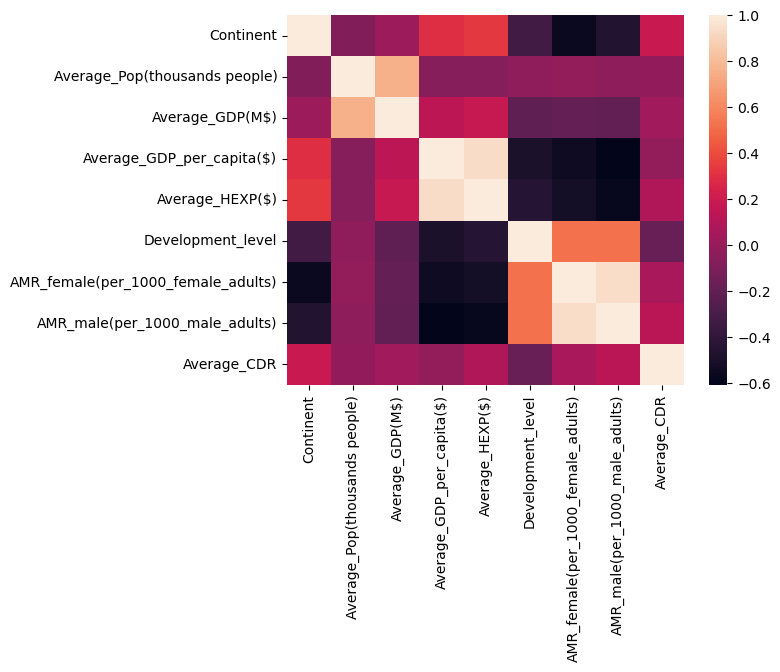

In [16]:
sns.heatmap(data.corr())


In [17]:
features = data.iloc[:-1, :-1].values.astype(float)
labels = data.iloc[:-1, -1].values.astype(int)

In [18]:
features

array([[-0.52798478, -0.0155393 , -0.24728456, ...,  0.65529266,
         0.87800788,  1.15768683],
       [ 0.70135292, -0.23971302, -0.248524  , ...,  0.65529266,
        -0.91833907, -0.95517619],
       [-1.14265364,  0.01238234, -0.14545985, ...,  0.65529266,
        -0.71283537, -0.96812668],
       ...,
       [ 0.08668407, -0.25537386, -0.25948697, ...,  0.65529266,
         0.06667782, -0.09155237],
       [-0.52798478,  0.34254332, -0.01045135, ...,  0.65529266,
        -0.67579484, -0.23400777],
       [-1.14265364, -0.13981615, -0.24500001, ...,  0.65529266,
         1.19510805,  1.34102327]])

In [19]:
labels

array([ 7, 10,  4,  7,  6,  8, 11,  6, 10,  6,  2,  5,  8, 10,  5,  9,  6,
       14,  7,  7,  5, 18,  8,  7,  5,  6,  8,  7, 11, 12,  7,  7,  6,  8,
        6, 14, 11,  6, 11,  9,  8,  8,  6,  6,  8,  8,  6, 12,  9,  6,  8,
       10,  9,  7, 14, 11,  7, 12,  8,  5,  9,  8,  8,  8,  4, 14,  6,  7,
        8,  4,  6, 11,  7, 11,  3,  8,  7,  6,  2, 16,  6, 13,  8, 15,  7,
        6,  6,  5,  2,  9,  7,  7,  7,  9,  8,  5, 12,  5,  8,  9,  9,  6,
        7,  6,  5,  8, 13, 12,  7,  3,  7,  5,  6,  6,  7,  6, 12, 11,  1,
       15,  6,  5,  6,  2,  5, 17,  8,  9,  5, 10,  5,  9, 10,  9,  7,  6,
        7,  8,  8,  5,  7,  6,  8,  6,  8,  6,  6, 10,  5,  1, 10,  4,  5,
        6,  6])

In [20]:
featuresT = torch.Tensor(features)
labelsT = torch.Tensor(labels)[:, None]

In [21]:
featuresT

tensor([[-0.5280, -0.0155, -0.2473,  ...,  0.6553,  0.8780,  1.1577],
        [ 0.7014, -0.2397, -0.2485,  ...,  0.6553, -0.9183, -0.9552],
        [-1.1427,  0.0124, -0.1455,  ...,  0.6553, -0.7128, -0.9681],
        ...,
        [ 0.0867, -0.2554, -0.2595,  ...,  0.6553,  0.0667, -0.0916],
        [-0.5280,  0.3425, -0.0105,  ...,  0.6553, -0.6758, -0.2340],
        [-1.1427, -0.1398, -0.2450,  ...,  0.6553,  1.1951,  1.3410]])

In [22]:
featuresT.shape

torch.Size([155, 8])

In [23]:
featuresT.shape[1]

8

In [24]:
labelsT

tensor([[ 7.],
        [10.],
        [ 4.],
        [ 7.],
        [ 6.],
        [ 8.],
        [11.],
        [ 6.],
        [10.],
        [ 6.],
        [ 2.],
        [ 5.],
        [ 8.],
        [10.],
        [ 5.],
        [ 9.],
        [ 6.],
        [14.],
        [ 7.],
        [ 7.],
        [ 5.],
        [18.],
        [ 8.],
        [ 7.],
        [ 5.],
        [ 6.],
        [ 8.],
        [ 7.],
        [11.],
        [12.],
        [ 7.],
        [ 7.],
        [ 6.],
        [ 8.],
        [ 6.],
        [14.],
        [11.],
        [ 6.],
        [11.],
        [ 9.],
        [ 8.],
        [ 8.],
        [ 6.],
        [ 6.],
        [ 8.],
        [ 8.],
        [ 6.],
        [12.],
        [ 9.],
        [ 6.],
        [ 8.],
        [10.],
        [ 9.],
        [ 7.],
        [14.],
        [11.],
        [ 7.],
        [12.],
        [ 8.],
        [ 5.],
        [ 9.],
        [ 8.],
        [ 8.],
        [ 8.],
        [ 4.],
        [14.],
        [ 

In [25]:
train_data, test_data, train_labels, test_labels = train_test_split(featuresT, labelsT, shuffle = True, test_size = 0.2)
print(f'Train data: {len(train_data)} | Train labels: {len(train_labels)}')
print(f'Test data: {len(test_data)} | Test labels: {len(test_labels)}')

Train data: 124 | Train labels: 124
Test data: 31 | Test labels: 31


In [26]:
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

batchsize = 16

train_dataloader = DataLoader(train_dataset, batch_size = batchsize, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = test_dataset.tensors[0].shape[0])

In [27]:
len(train_dataloader)

8

In [28]:
len(test_dataloader)

1

In [29]:
len(train_dataset)

124

In [30]:
len(test_dataset)

31

In [31]:
def makeTheNet():

  class ANNnet(nn.Module):
    def __init__(self):
      super().__init__()

      self.fc1 = nn.Linear(featuresT.shape[1], 256)
      self.fc2 = nn.Linear(256, 256)
      self.fc3 = nn.Linear(256, 256)
      self.fc4 = nn.Linear(256, 1)

    def forward(self, x):
      x = F.leaky_relu( self.fc1(x) )
      x = F.leaky_relu( self.fc2(x) )
      x = F.leaky_relu( self.fc3(x) )
      x = F.leaky_relu( self.fc4(x) )
      return x

  net = ANNnet()

  lossfun = nn.MSELoss()

  optimizer = torch.optim.Adam(net.parameters(), lr = .001)

  return net, lossfun, optimizer

In [32]:
net, lossfun, optimizer = makeTheNet()


In [33]:
net

ANNnet(
  (fc1): Linear(in_features=8, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=1, bias=True)
)

In [34]:
lossfun

MSELoss()

In [35]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [36]:
X, y = next(iter(train_dataloader))
yHat = net(X)
lossfun(yHat.squeeze(dim = 1), y.squeeze(dim = 1))

tensor(62.9630, grad_fn=<MseLossBackward0>)

In [37]:
X

tensor([[ 1.9307, -0.0507, -0.1018, -0.3634, -0.4018,  0.6553, -0.2657, -0.2427],
        [ 1.3160, -0.0218,  1.0259,  1.6476,  2.5664, -0.5763, -0.9404, -1.1037],
        [ 0.7014, -0.2143, -0.2069, -0.1615, -0.1608, -1.8080, -0.3855,  0.0496],
        [-1.1427, -0.1370, -0.2517, -0.6619, -0.6001,  0.6553,  1.3238,  1.7733],
        [-1.1427, -0.1753, -0.2497, -0.6373, -0.5995,  0.6553,  1.4683,  0.8530],
        [ 1.3160, -0.2154, -0.2508, -0.5964, -0.5235,  0.6553, -0.3313, -0.0453],
        [ 0.0867, -0.2516, -0.2568, -0.4371, -0.4922,  0.6553,  0.6178,  0.3580],
        [ 0.0867, -0.2567, -0.2598, -0.4628, -0.4841,  0.6553,  0.3104,  0.2836],
        [ 0.7014, -0.2550, -0.2430,  2.5315,  2.6273, -0.5763, -1.0324, -1.3263],
        [ 0.0867, -0.0987,  0.8231,  2.2339,  2.6855, -0.5763, -1.0551, -1.2397],
        [ 0.7014, -0.2496, -0.2412,  0.3637,  0.7039, -1.8080, -1.0677, -1.2970],
        [ 1.9307, -0.2162, -0.2331, -0.4100, -0.3840,  0.6553, -0.0976,  0.0386],
        [-0.5280

In [38]:
y

tensor([[ 7.],
        [ 7.],
        [18.],
        [ 6.],
        [ 9.],
        [ 5.],
        [ 8.],
        [ 6.],
        [ 6.],
        [ 6.],
        [ 6.],
        [ 6.],
        [ 6.],
        [ 8.],
        [ 8.],
        [ 6.]])

In [39]:
yHat

tensor([[-7.5584e-05],
        [-1.0464e-03],
        [-3.3401e-04],
        [-2.8465e-04],
        [-2.3095e-04],
        [ 1.0371e-02],
        [-1.8578e-06],
        [ 5.8457e-03],
        [-1.4275e-03],
        [-1.2525e-03],
        [-7.1796e-04],
        [ 6.8876e-05],
        [ 1.8972e-02],
        [ 8.6983e-03],
        [-1.9876e-05],
        [ 1.0677e-02]], grad_fn=<LeakyReluBackward0>)

In [40]:
def functionToTrainNet():
  epochs = 100

  net, lossfun, optimizer = makeTheNet()

  trainLoss = []
  testLoss = []

  for epochi in tqdm(range(epochs)):

    net.train()

    batchLoss = []

    for X, y in train_dataloader:
      yHat = net(X)
    
      yHat, y = yHat.squeeze(dim = 1), y.squeeze(dim = 1)
    
      loss = lossfun(yHat, y)

      batchLoss.append(loss.item())

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    trainLoss.append(np.mean(batchLoss))

    net.eval()
    with torch.no_grad():
      X, y = next(iter(test_dataloader))
      yHat = net(X)
        
      yHat, y = yHat.squeeze(dim = 1), y.squeeze(dim = 1)
    
      loss = lossfun(yHat, y)

      testLoss.append(loss.item())

  return trainLoss, testLoss

In [41]:
trainLoss, testLoss = functionToTrainNet()


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.72it/s]


In [42]:
trainLoss

[57.40238547325134,
 36.371450662612915,
 16.096141695976257,
 11.492417812347412,
 9.329024910926819,
 8.413405656814575,
 7.707476317882538,
 7.617341995239258,
 7.3491358160972595,
 6.7265530824661255,
 6.469056785106659,
 6.32051894068718,
 6.277533933520317,
 5.850534915924072,
 5.7374022006988525,
 5.638007879257202,
 5.391277104616165,
 4.939475774765015,
 5.012195333838463,
 4.90222829580307,
 4.51058167219162,
 4.26176655292511,
 4.18218407034874,
 3.9558486342430115,
 3.4960652738809586,
 3.2151366025209427,
 3.220012739300728,
 2.8649166971445084,
 2.662814699113369,
 2.521116517484188,
 2.5048726946115494,
 2.2313661873340607,
 2.333092227578163,
 2.0063742846250534,
 2.038391962647438,
 2.0113541409373283,
 2.0796116068959236,
 1.8900125846266747,
 1.6777081489562988,
 1.7511151731014252,
 1.5716541558504105,
 1.566906489431858,
 1.667046844959259,
 1.582792729139328,
 1.62910645455122,
 1.5539036467671394,
 1.5367652773857117,
 1.405121110379696,
 1.3868828490376472,
 1.2

In [43]:
testLoss

[36.334205627441406,
 23.7504825592041,
 13.642067909240723,
 10.222731590270996,
 7.984407901763916,
 7.574517250061035,
 7.875699043273926,
 7.614268779754639,
 7.968031883239746,
 7.654837608337402,
 7.188676357269287,
 7.287210464477539,
 7.450618743896484,
 6.78624963760376,
 7.0755815505981445,
 6.847113132476807,
 6.869810104370117,
 6.236918926239014,
 6.490240097045898,
 6.440634250640869,
 6.272004127502441,
 6.119513511657715,
 6.100810527801514,
 5.600785732269287,
 5.500903129577637,
 5.185635566711426,
 5.608623027801514,
 4.6485981941223145,
 4.865593433380127,
 5.281359672546387,
 4.463063716888428,
 4.5861711502075195,
 4.14329195022583,
 4.808720588684082,
 4.278834342956543,
 3.7894723415374756,
 4.084438323974609,
 4.293390274047852,
 3.9000980854034424,
 3.945024013519287,
 3.9248218536376953,
 3.9209835529327393,
 3.8350725173950195,
 3.581451177597046,
 4.012907028198242,
 3.7348153591156006,
 3.938161611557007,
 3.77658748626709,
 3.8555307388305664,
 3.66217255

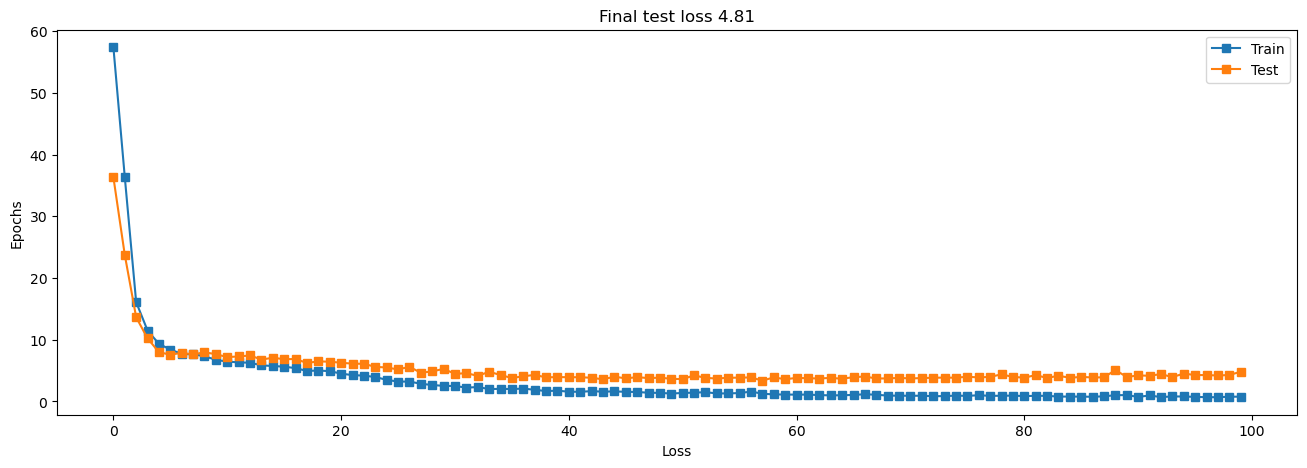

In [44]:
plt.figure(figsize=(16,5))
plt.plot(trainLoss, 's-', label = 'Train')
plt.plot(testLoss, 's-', label = 'Test')
plt.title(f'Final test loss {testLoss[-1]:.2f}')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()